In [ ]:
# Description : Ce programme détecte si un e-mail est un spam (1) ou pas (0)

In [9]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Load the dataset
dataset = pd.read_csv('dataset/emails.csv')
dataset.shape

(5728, 2)

In [31]:
# Get the columns names
dataset.columns

Index(['text', 'spam'], dtype='object')

In [32]:
# Check for duplicates and remove them
dataset.drop_duplicates (inplace = True)

In [33]:
# Show the new shape
dataset.shape

(5695, 2)

In [ ]:
# Show 

In [11]:
# Show dataset head (first 5 records)
dataset.head() 

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [12]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [13]:
# Show dataset statistics
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


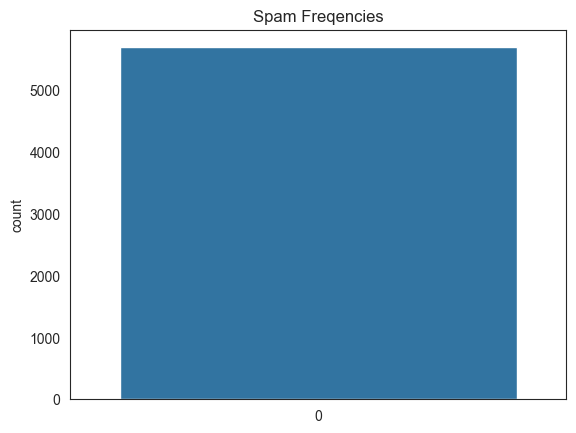

In [37]:
# Data Visualization

# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(dataset['spam'])
plt.title("Spam Freqencies")
plt.show()

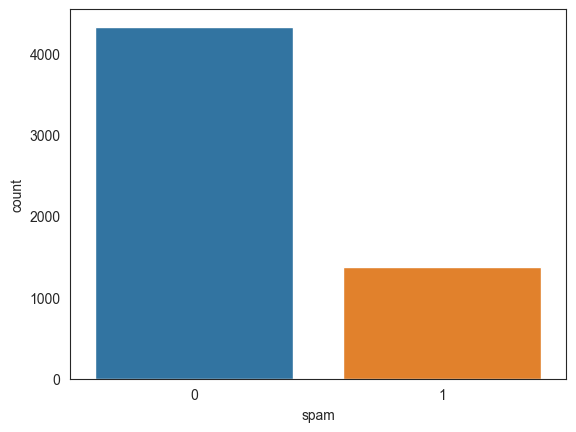

In [39]:
# count plot on single categorical variable
sns.countplot(x ='spam', data = dataset)
 
# Show the plot
plt.show()

In [15]:
# Data Cleaning
# Check for missing data for each column 
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [16]:
# Check for duplicates and remove them 
dataset.drop_duplicates(inplace=True)

In [17]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [18]:
# Fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])

In [34]:
# Get the shape of message
message.shape

(5695, 37229)

In [20]:
# Save the vectorizer
dump(message, open("models/vectorizer.pkl", "wb"))

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

In [22]:
# Model creation
model = MultinomialNB()

In [23]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Model saving
dump(model, open("models/model.pkl", 'wb'))

In [25]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [26]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [40]:
# Model Evaluation | Classification report
md = classification_report(y_test, y_pred)
print (md)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



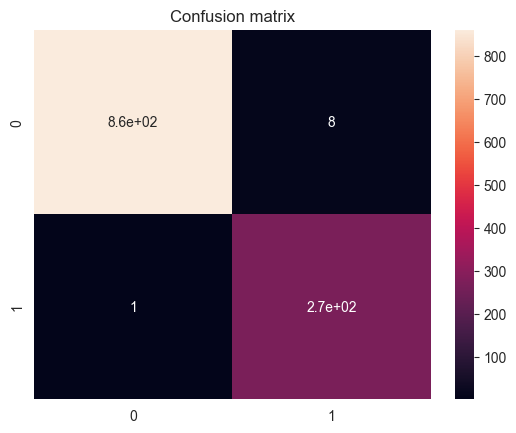

In [28]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()